In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
import scipy.stats as stats

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

## MATHEMATICAL TRANSFORM DAY-30 ##

## Normally Distribute karne k liye ##

## Function Transformation ##

In [13]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [14]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [15]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [16]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

C:\Users\mrraj\AppData\Local\Temp\ipykernel_2996\694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [17]:
df['Age']=df['Age'].fillna(df['Age'].mean())


In [18]:
df

,Survived,Age,Fare
0,0,22.000000,7.2500
1,1,38.000000,71.2833
2,1,26.000000,7.9250
3,1,35.000000,53.1000
4,0,35.000000,8.0500
...,...,...,...
886,0,27.000000,13.0000
887,1,19.000000,30.0000
888,0,29.699118,23.4500
889,1,26.000000,30.0000


In [19]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [20]:
x=df.iloc[:,1:]

In [21]:
y=df.iloc[:,0]

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [23]:
x_train

,Age,Fare
331,45.500000,28.5000
733,23.000000,13.0000
382,32.000000,7.9250
704,26.000000,7.8542
813,6.000000,31.2750
...,...,...
106,21.000000,7.6500
270,29.699118,31.0000
860,41.000000,14.1083
435,14.000000,120.0000


C:\Users\mrraj\AppData\Local\Temp\ipykernel_2996\4253277149.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])


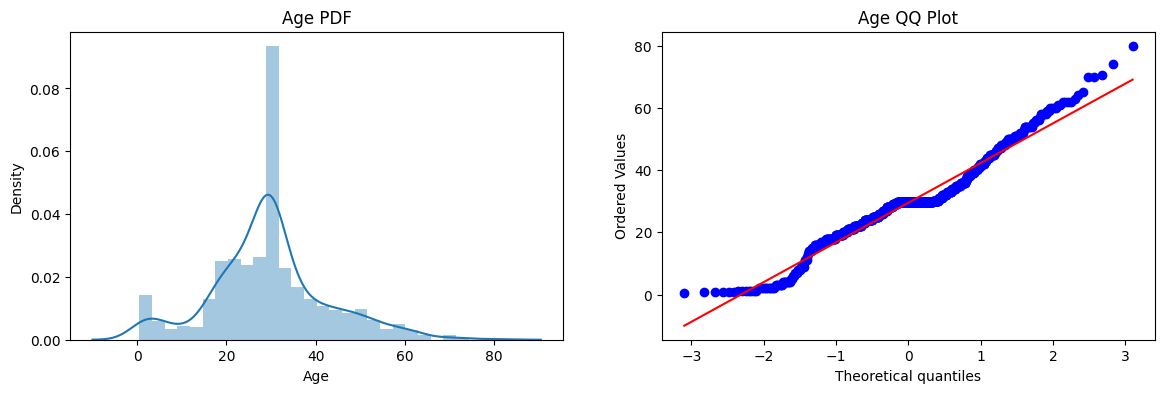

In [24]:

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(x_train['Age'])
    plt.title('Age PDF')

    plt.subplot(122)
    stats.probplot(x_train['Age'],dist="norm",plot=plt)
    plt.title('Age QQ Plot')
    plt.show()

C:\Users\mrraj\AppData\Local\Temp\ipykernel_2996\3634183076.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])


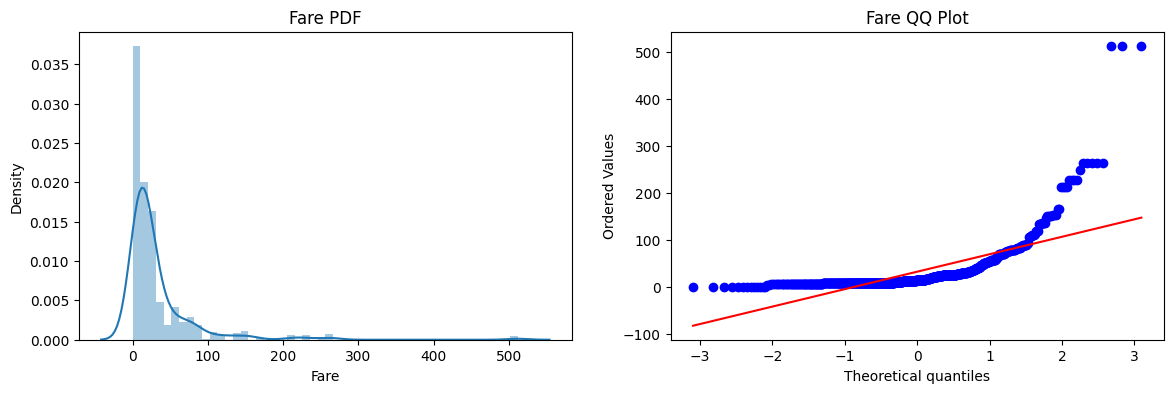

In [25]:

    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(x_train['Fare'])
    plt.title('Fare PDF')

    plt.subplot(122)
    stats.probplot(x_train['Fare'],dist="norm",plot=plt)
    plt.title('Fare QQ Plot')
    plt.show()

In [26]:
## Without Transformation##

In [27]:
clf1=LogisticRegression()
clf2=DecisionTreeClassifier()

In [28]:
clf1.fit(x_train,y_train)
clf2.fit(x_train,y_train)
y_pred1=clf1.predict(x_test)
y_pred2=clf2.predict(x_test)

In [29]:
accuracy_score(y_test,y_pred1)

0.6480446927374302

In [30]:
accuracy_score(y_test,y_pred2)

0.6815642458100558

In [31]:
## Apply Log Transform ##

In [32]:
trf=FunctionTransformer(func=np.log1p)

In [33]:
x_train_transformed=trf.fit_transform(x_train)

In [34]:
x_test_transformed=trf.fit_transform(x_test)

In [35]:
clf1.fit(x_train_transformed,y_train)
clf2.fit(x_train_transformed,y_train)
y_pred1=clf1.predict(x_test_transformed)
y_pred2=clf2.predict(x_test_transformed)

In [36]:
accuracy_score(y_test,y_pred1)

0.6815642458100558

In [37]:
accuracy_score(y_test,y_pred2)

0.6759776536312849

In [38]:
## see the Change after Transform##

In [39]:
x_transformed=trf.fit_transform(x)

In [40]:
np.mean(cross_val_score(clf1,x_transformed,y,scoring='accuracy',cv=10))


0.678027465667915

In [41]:
np.mean(cross_val_score(clf2,x_transformed,y,scoring='accuracy',cv=10))

0.6554806491885145

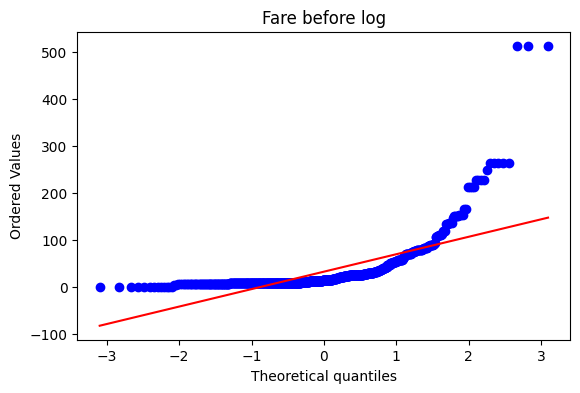

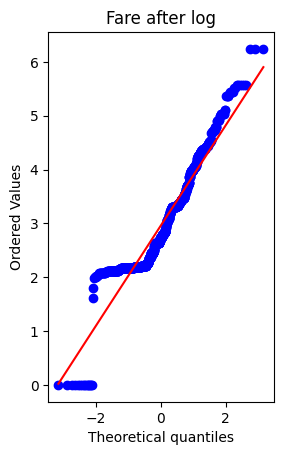

In [42]:

    plt.figure(figsize=(14,4))


    plt.subplot(121)
    stats.probplot(x_train['Fare'],dist="norm",plot=plt)
    plt.title('Fare before log')
    plt.show()
   

    plt.subplot(121)
    stats.probplot(x_transformed['Fare'],dist="norm",plot=plt)
    plt.title('Fare after log')
    plt.show()

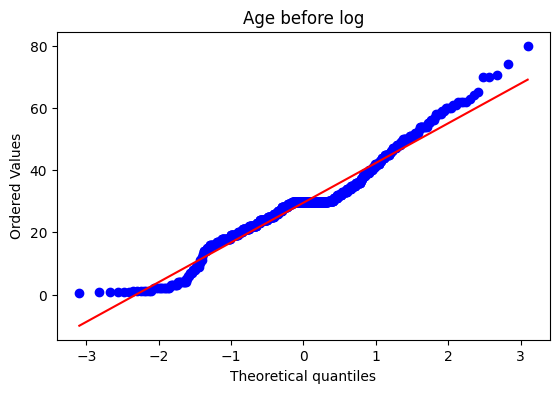

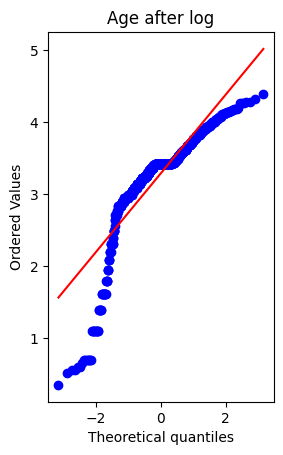

In [43]:
plt.figure(figsize=(14,4))
plt.subplot(122)
stats.probplot(x_train['Age'],dist="norm",plot=plt)
plt.title('Age before log')
plt.show()
   

plt.subplot(122)
stats.probplot(x_transformed['Age'],dist="norm",plot=plt)
plt.title('Age after log')
plt.show()

In [44]:
## Age before log is good but vice versa in fare ##

In [45]:
## sirf fare par lagate h ##

In [46]:
trf2=ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

In [47]:
x_train_transformed2=trf2.fit_transform(x_train)

In [48]:
x_test_transformed2=trf2.transform(x_test)

In [49]:
clf1.fit(x_train_transformed2,y_train)
clf2.fit(x_train_transformed2,y_train)

DecisionTreeClassifier()

In [50]:
y_pred1=clf1.predict(x_test_transformed2)
y_pred2=clf2.predict(x_test_transformed2)

In [51]:
accuracy_score(y_test,y_pred1)

0.6703910614525139

In [52]:
accuracy_score(y_test,y_pred2)

0.6703910614525139

In [53]:
## see the results##

In [54]:
x_transformed2=trf2.fit_transform(x)

In [55]:
np.mean(cross_val_score(clf1,x_transformed2,y,scoring='accuracy',cv=10))


0.6712609238451936

In [56]:
np.mean(cross_val_score(clf2,x_transformed,y,scoring='accuracy',cv=10))

0.6610861423220974

## Power Transform  Day-31 ##

In [57]:
df=pd.read_csv('concrete_data.csv')

In [58]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [59]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [60]:
#to check min to box cox or yeo johnson

In [61]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [62]:
x=df.drop(columns=['Strength'])
y=df['Strength']

In [63]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [64]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [65]:
y_pred=lr.predict(x_test)

In [66]:
r2_score(y_test,y_pred)

0.6275531792314848

In [67]:
#Cross checking with cross_val
np.mean(cross_val_score(lr,x,y,scoring='r2'))

0.4609940491662864

C:\Users\mrraj\AppData\Local\Temp\ipykernel_2996\1299563800.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


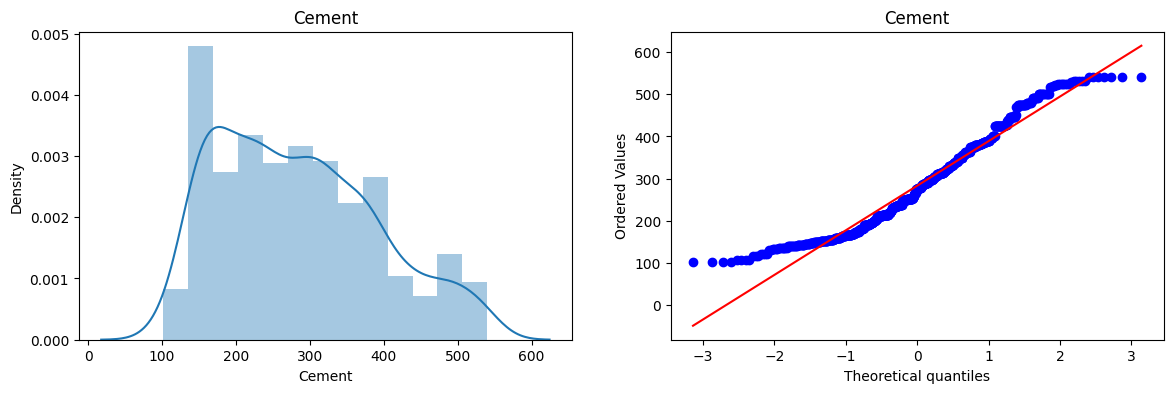

C:\Users\mrraj\AppData\Local\Temp\ipykernel_2996\1299563800.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


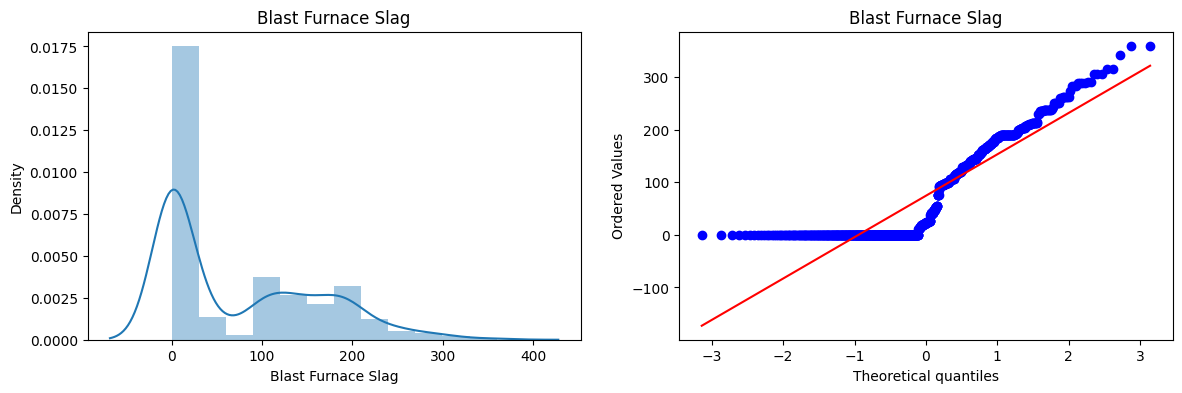

C:\Users\mrraj\AppData\Local\Temp\ipykernel_2996\1299563800.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


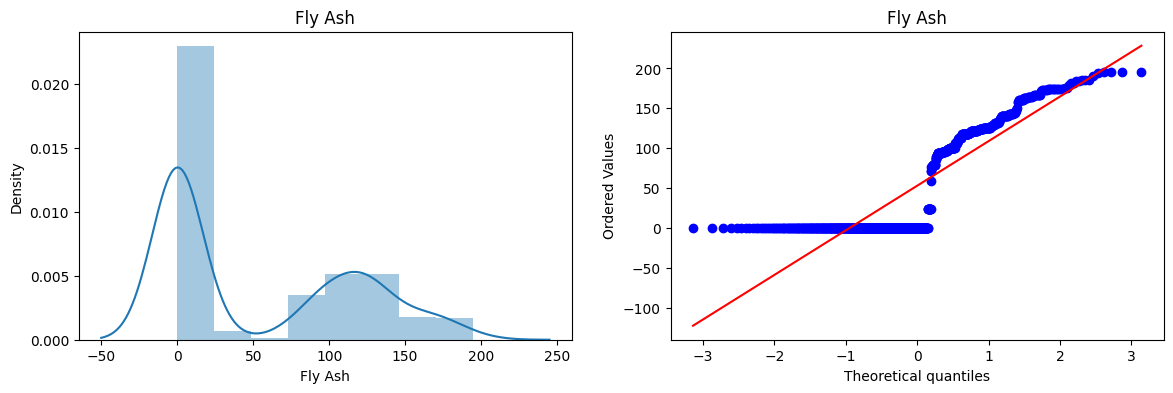

C:\Users\mrraj\AppData\Local\Temp\ipykernel_2996\1299563800.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


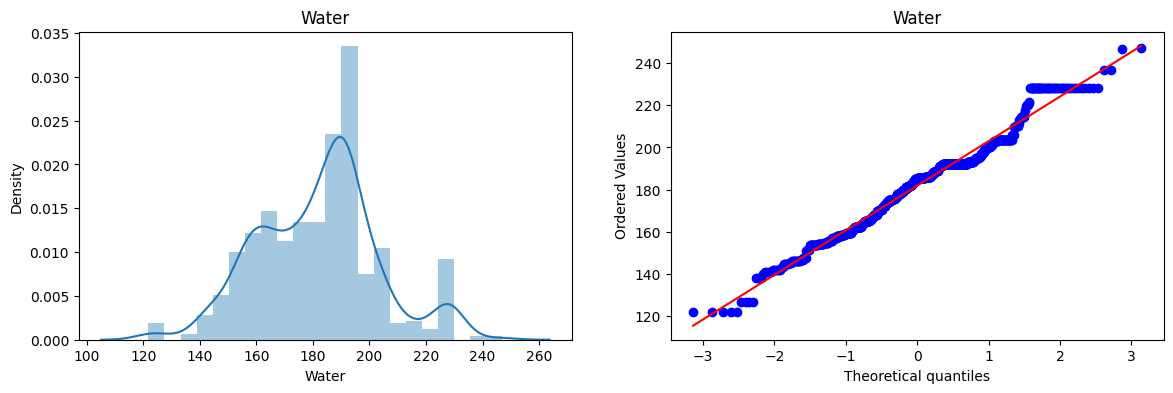

C:\Users\mrraj\AppData\Local\Temp\ipykernel_2996\1299563800.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


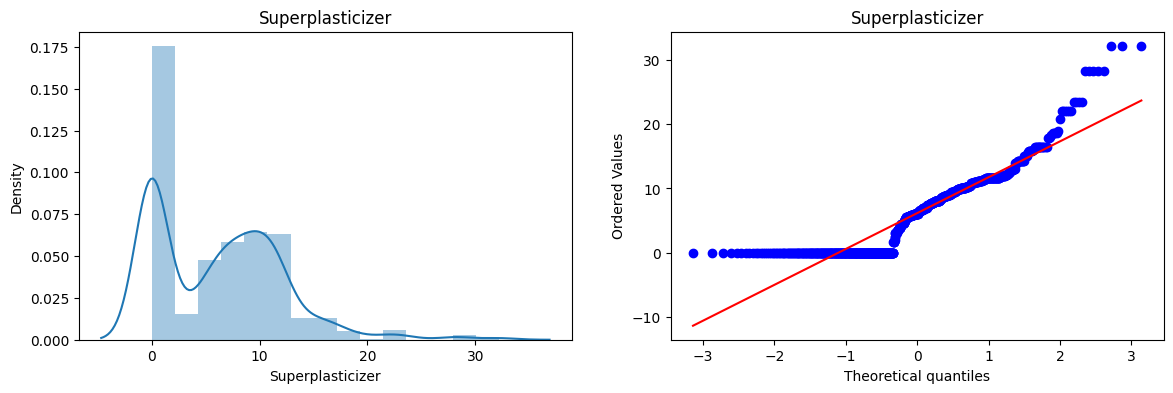

C:\Users\mrraj\AppData\Local\Temp\ipykernel_2996\1299563800.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


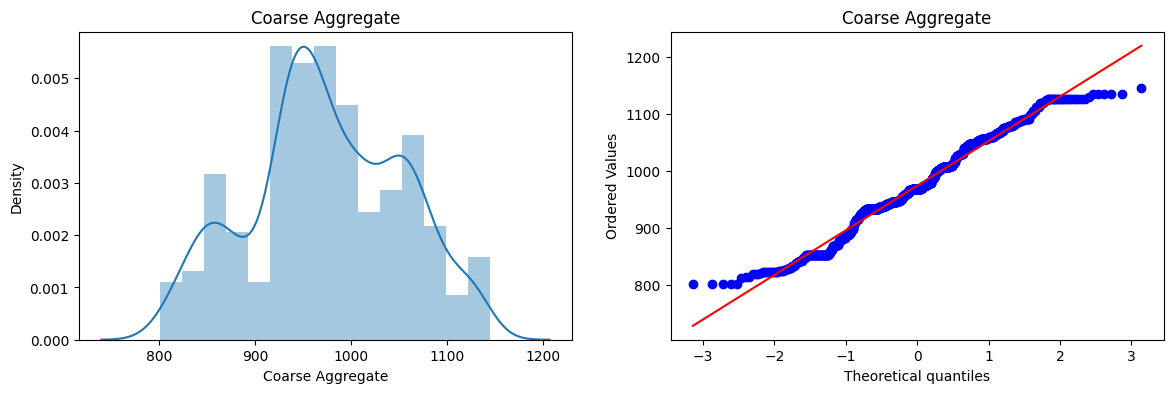

C:\Users\mrraj\AppData\Local\Temp\ipykernel_2996\1299563800.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


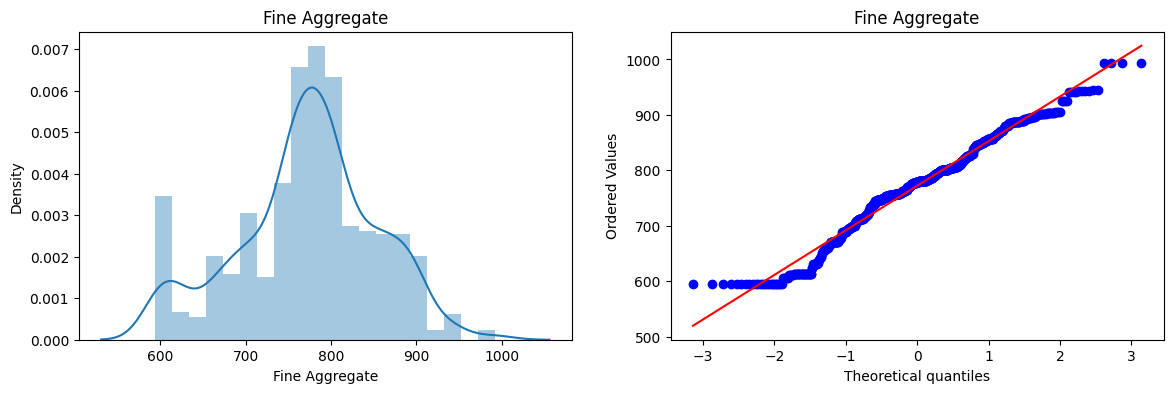

C:\Users\mrraj\AppData\Local\Temp\ipykernel_2996\1299563800.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[col])


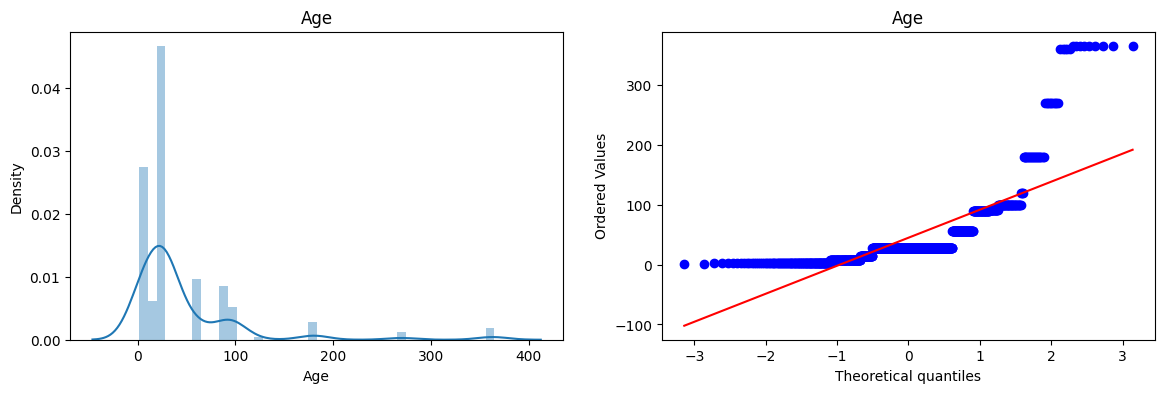

In [68]:
for col in x_train.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.distplot(x_train[col])
    plt.title(col)

    plt.subplot(122)
    stats.probplot(x_train[col],dist="norm",plot=plt)
    plt.title(col)
    plt.show()

In [69]:
pt=PowerTransformer(method='box-cox')
x_train_transformed=pt.fit_transform(x_train+0.00001)
x_test_transformed=pt.transform(x_test+0.00001)

pd.DataFrame({'cols':x_train.columns,'box_cox_lamdas':pt.lambdas_})

,cols,box_cox_lamdas
0,Cement,0.177025
1,Blast Furnace Slag,0.027842
2,Fly Ash,-0.044554
3,Water,0.772681
4,Superplasticizer,0.113892
5,Coarse Aggregate,1.129813
6,Fine Aggregate,1.782018
7,Age,0.066630


In [70]:
lr=LinearRegression()

In [71]:
lr.fit(x_train_transformed,y_train)

LinearRegression()

In [72]:
y_pre=lr.predict(x_test_transformed)

In [73]:
r2_score(y_test,y_pre)

0.8054599374335424

In [74]:
x_transformed=pt.fit_transform(x+0.0000001)

In [75]:
#Crosas checking with cross_val
np.mean(cross_val_score(lr,x_transformed,y,scoring='r2'))

0.6658537947024266

## Power Transformer ##

In [76]:
pt1=PowerTransformer()

In [77]:
x_train_transformed2=pt1.fit_transform(x_train)

In [78]:
x_test_transformed2=pt1.fit_transform(x_test)

In [79]:
lr=LinearRegression()

In [80]:
lr.fit(x_train_transformed2,y_train)

LinearRegression()

In [81]:
y_pred3=lr.predict(x_test_transformed2)

In [82]:
print(r2_score(y_test,y_pred3))

0.8153845515001845


In [83]:
x_transformed2=pt1.fit_transform(x)

In [84]:
#Crosas checking with cross_val
np.mean(cross_val_score(lr,x_transformed2,y,scoring='r2'))

0.6834625134285748

## Encoding Numerical Features Day-32 ##

In [85]:
from sklearn.preprocessing import KBinsDiscretizer

In [86]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])


In [87]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [88]:
df.shape

(891, 3)

In [89]:
##WithoutUsing Encoding


In [90]:
## Missing values ko drop
df.dropna(inplace=True)

In [91]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [92]:
df.shape

(714, 3)

In [93]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [94]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [95]:
clf=DecisionTreeClassifier()

In [96]:
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [97]:
accuracy_score(y_test,y_pred)

0.6223776223776224

In [98]:
np.mean(cross_val_score(clf,x,y,cv=10,scoring='accuracy'))

0.6289319248826291

In [99]:
## Using Encoding

In [100]:
kbin_age=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')
kbin_fare=KBinsDiscretizer(n_bins=10,encode='ordinal',strategy='quantile')



In [101]:
trf=ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [102]:
x_train_trf=trf.fit_transform(x_train)
x_test_trf=trf.transform(x_test)

In [103]:
trf.named_transformers_

{'first': KBinsDiscretizer(encode='ordinal', n_bins=10),
 'second': KBinsDiscretizer(encode='ordinal', n_bins=10)}

In [95]:
trf.named_transformers_['first'].n_bins_

array([10])

In [96]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42, 14.  , 19.  , 22.  , 25.  , 28.5 , 32.  , 36.  , 42.  ,
              50.  , 80.  ])                                                ],
      dtype=object)

In [104]:
output=pd.DataFrame({
    'age':x_train['Age'],
    'age_trf':x_train_trf[:,0],
    'fare':x_train['Fare'],
    'fare_trf':x_train_trf[:,1]
})

In [105]:
output['age_labels']=pd.cut(x=x_train['Age'],
                            bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels']=pd.cut(x=x_train['Fare'],3
                             
                             bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [106]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
644,0.75,0.0,19.2583,5.0,"(0.42, 14.0]","(15.75, 26.0]"
634,9.00,0.0,27.9000,6.0,"(0.42, 14.0]","(26.0, 29.125]"
432,42.00,8.0,26.0000,6.0,"(36.0, 42.0]","(15.75, 26.0]"
216,27.00,4.0,7.9250,2.0,"(25.0, 28.5]","(7.896, 9.225]"
81,29.00,5.0,9.5000,3.0,"(28.5, 32.0]","(9.225, 13.0]"


In [107]:
clf.fit(x_train_trf,y_train)
y_pred2=clf.predict(x_test_trf)

In [108]:
accuracy_score(y_test,y_pred2)

0.6223776223776224

In [109]:
x_trf=trf.fit_transform(x)

In [110]:
np.mean(cross_val_score(clf,x_trf,y,cv=10,scoring='accuracy'))


0.682140062597809

In [111]:
##Using Binuzation

In [105]:
df = pd.read_csv('train.csv')[['Age','Fare','SibSp','Parch','Survived']]

In [106]:
df.dropna(inplace=True)

In [107]:
df.head()

,Age,Fare,SibSp,Parch,Survived
0,22.0,7.2500,1,0,0
1,38.0,71.2833,1,0,1
2,26.0,7.9250,0,0,1
3,35.0,53.1000,1,0,1
4,35.0,8.0500,0,0,0


In [108]:
df['family'] = df['SibSp'] + df['Parch']


In [109]:
df.head()

,Age,Fare,SibSp,Parch,Survived,family
0,22.0,7.2500,1,0,0,1
1,38.0,71.2833,1,0,1,1
2,26.0,7.9250,0,0,1,0
3,35.0,53.1000,1,0,1,1
4,35.0,8.0500,0,0,0,0


In [110]:
df.drop(columns=['SibSp','Parch'],inplace=True)

In [111]:
df.head()

,Age,Fare,Survived,family
0,22.0,7.2500,0,1
1,38.0,71.2833,1,1
2,26.0,7.9250,1,0
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [112]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [113]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [114]:
X_train.head()

,Age,Fare,family
328,31.0,20.5250,2
73,26.0,14.4542,1
253,30.0,16.1000,1
719,33.0,7.7750,0
666,25.0,13.0000,0


In [115]:
# Without binarization

clf = DecisionTreeClassifier()

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

accuracy_score(y_test,y_pred)

0.6293706293706294

In [116]:
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.6471048513302035

In [117]:
# Applying Binarization

from sklearn.preprocessing import Binarizer

In [118]:
trf = ColumnTransformer([
    ('bin',Binarizer(copy=False ),['family'])
],remainder='passthrough')

In [119]:

X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [120]:
pd.DataFrame(X_train_trf,columns=['family','Age','Fare'])

,family,Age,Fare
0,1.0,31.0,20.5250
1,1.0,26.0,14.4542
2,1.0,30.0,16.1000
3,0.0,33.0,7.7750
4,0.0,25.0,13.0000
...,...,...,...
566,1.0,46.0,61.1750
567,0.0,25.0,13.0000
568,0.0,41.0,134.5000
569,1.0,33.0,20.5250


In [121]:

clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

accuracy_score(y_test,y_pred2)

0.6153846153846154

In [122]:

X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X_trf,y,cv=10,scoring='accuracy'))

0.6233568075117372

## Handling Mixed Variable Day-33 ##

In [112]:
df=pd.read_csv('tt mix vr.csv')

In [113]:
df.head()

,Cabin,Ticket,number,Survived
0,NaN,A/5 21171,5,0
1,C85,PC 17599,3,1
2,NaN,STON/O2. 3101282,6,1
3,C123,113803,3,1
4,NaN,373450,A,0


In [114]:
df.sample()

,Cabin,Ticket,number,Survived
641,B35,PC 17477,2,1


In [126]:
df['number'].unique()

array(['5', '3', '6', 'A', '2', '1', '4'], dtype=object)

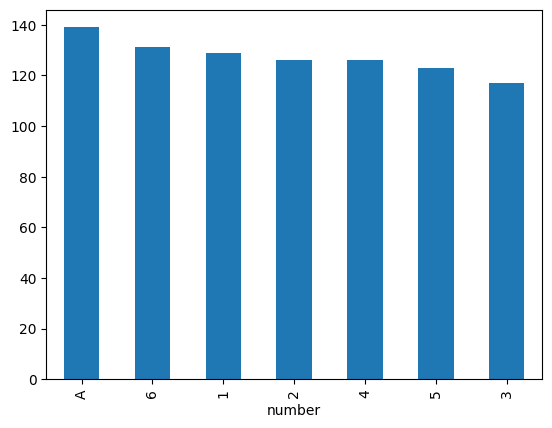

In [127]:
fig=df['number'].value_counts().plot.bar()

In [115]:
# Extraxt numerical part
df['number_numerical']=pd.to_numeric(df["number"],errors='coerce',downcast='integer')


In [116]:
# Extraxt categorical part
df['number_categorical']=np.where(df['number_numerical'].isnull(),df['number'],np.nan)


In [117]:
df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical
0,NaN,A/5 21171,5,0,5.0,NaN
1,C85,PC 17599,3,1,3.0,NaN
2,NaN,STON/O2. 3101282,6,1,6.0,NaN
3,C123,113803,3,1,3.0,NaN
4,NaN,373450,A,0,NaN,A


In [118]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [119]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [133]:
## In cabin capture numerical part

In [120]:
df['cabin_num']=df['Cabin'].str.extract('(\d+)')

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
C:\Users\mrraj\AppData\Local\Temp\ipykernel_2996\734186812.py:1: SyntaxWarning: invalid escape sequence '\d'
  df['cabin_num']=df['Cabin'].str.extract('(\d+)')


In [135]:
## In cabin capture numerical part

In [121]:
df['cabin_cat']=df['Cabin'].str[0]

In [122]:
df.head()

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_num,cabin_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN
1,C85,PC 17599,3,1,3.0,NaN,85,C
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN
3,C123,113803,3,1,3.0,NaN,123,C
4,NaN,373450,A,0,NaN,A,NaN,NaN


In [138]:
df['cabin_cat'].value_counts()

cabin_cat
C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: count, dtype: int64

In [139]:
## extract number from ticket number

In [140]:
# extract the last bit of ticket as number
df['ticket_num'] = df['Ticket'].apply(lambda s: s.split()[-1])
df['ticket_num'] = pd.to_numeric(df['ticket_num'],
                                   errors='coerce',
                                   downcast='integer')

# extract the first part of ticket as category
df['ticket_cat'] = df['Ticket'].apply(lambda s: s.split()[0])
df['ticket_cat'] = np.where(df['ticket_cat'].str.isdigit(), np.nan,
                              df['ticket_cat'])

df.head(20)

,Cabin,Ticket,number,Survived,number_numerical,number_categorical,cabin_num,cabin_cat,ticket_num,ticket_cat
0,NaN,A/5 21171,5,0,5.0,NaN,NaN,NaN,21171.0,A/5
1,C85,PC 17599,3,1,3.0,NaN,85,C,17599.0,PC
2,NaN,STON/O2. 3101282,6,1,6.0,NaN,NaN,NaN,3101282.0,STON/O2.
3,C123,113803,3,1,3.0,NaN,123,C,113803.0,NaN
4,NaN,373450,A,0,NaN,A,NaN,NaN,373450.0,NaN
5,NaN,330877,2,0,2.0,NaN,NaN,NaN,330877.0,NaN
6,E46,17463,2,0,2.0,NaN,46,E,17463.0,NaN
7,NaN,349909,5,0,5.0,NaN,NaN,NaN,349909.0,NaN
8,NaN,347742,1,1,1.0,NaN,NaN,NaN,347742.0,NaN
9,NaN,237736,A,1,NaN,A,NaN,NaN,237736.0,NaN


## Handling Date and Time Variables Day-34 ##

In [124]:
date=pd.read_csv('orders.csv')
time=pd.read_csv('messages.csv')

In [125]:
date.head()

,date,product_id,city_id,orders
0,2019-12-10,5628,25,3
1,2018-08-15,3646,14,157
2,2018-10-23,1859,25,1
3,2019-08-17,7292,25,1
4,2019-01-06,4344,25,3


In [126]:
time.head()

,date,msg
0,2013-12-15 00:50:00,ищу на сегодня мужика 37
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше


In [127]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        1000 non-null   object
 1   product_id  1000 non-null   int64 
 2   city_id     1000 non-null   int64 
 3   orders      1000 non-null   int64 
dtypes: int64(3), object(1)
memory usage: 31.4+ KB


In [128]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1000 non-null   object
 1   msg     1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [129]:
## Converting to datetime datatype

In [130]:
date['date']=pd.to_datetime(date['date'])

In [131]:
date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        1000 non-null   datetime64[ns]
 1   product_id  1000 non-null   int64         
 2   city_id     1000 non-null   int64         
 3   orders      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 31.4 KB


## Extract Year ##

In [132]:
date['date_year']=date['date'].dt.year
date.head()

,date,product_id,city_id,orders,date_year
0,2019-12-10,5628,25,3,2019
1,2018-08-15,3646,14,157,2018
2,2018-10-23,1859,25,1,2018
3,2019-08-17,7292,25,1,2019
4,2019-01-06,4344,25,3,2019


## Extract Month ##

In [133]:
date['date_month_no']=date['date'].dt.month
date.head()

,date,product_id,city_id,orders,date_year,date_month_no
0,2019-12-10,5628,25,3,2019,12
1,2018-08-15,3646,14,157,2018,8
2,2018-10-23,1859,25,1,2018,10
3,2019-08-17,7292,25,1,2019,8
4,2019-01-06,4344,25,3,2019,1


In [134]:
date['date_month_no']=date['date'].dt.month_name()
date.head()

,date,product_id,city_id,orders,date_year,date_month_no
0,2019-12-10,5628,25,3,2019,December
1,2018-08-15,3646,14,157,2018,August
2,2018-10-23,1859,25,1,2018,October
3,2019-08-17,7292,25,1,2019,August
4,2019-01-06,4344,25,3,2019,January


## Extract Days ##

In [135]:
date['date_day']=date['date'].dt.day
date.head()

,date,product_id,city_id,orders,date_year,date_month_no,date_day
0,2019-12-10,5628,25,3,2019,December,10
1,2018-08-15,3646,14,157,2018,August,15
2,2018-10-23,1859,25,1,2018,October,23
3,2019-08-17,7292,25,1,2019,August,17
4,2019-01-06,4344,25,3,2019,January,6


In [136]:
# day of week
date['date_dow_name']=date['date'].dt.day_name()

In [137]:
date.head()

,date,product_id,city_id,orders,date_year,date_month_no,date_day,date_dow_name
0,2019-12-10,5628,25,3,2019,December,10,Tuesday
1,2018-08-15,3646,14,157,2018,August,15,Wednesday
2,2018-10-23,1859,25,1,2018,October,23,Tuesday
3,2019-08-17,7292,25,1,2019,August,17,Saturday
4,2019-01-06,4344,25,3,2019,January,6,Sunday


In [138]:
## is weekend?


In [139]:
date['date_is_weekend'] = np.where(date['date_dow_name'].isin(['Sunday', 'Saturday']), 1,0)

date.drop(columns=['product_id','city_id','orders']).head()

,date,date_year,date_month_no,date_day,date_dow_name,date_is_weekend
0,2019-12-10,2019,December,10,Tuesday,0
1,2018-08-15,2018,August,15,Wednesday,0
2,2018-10-23,2018,October,23,Tuesday,0
3,2019-08-17,2019,August,17,Saturday,1
4,2019-01-06,2019,January,6,Sunday,1


In [140]:
## Extract week of the year
date['date_week'] = date['date'].dt.week

date.drop(columns=['product_id','city_id','orders']).head()

AttributeError: 'DatetimeProperties' object has no attribute 'week'

In [ ]:
## Extract Quarter
## Extract Semester 

## Extract Time elapsed between Dates ##

In [141]:
import datetime

In [142]:
today=datetime.datetime(2021,4,21,16,2,16,791379)

In [143]:
datetime.datetime(2021,4,21,16,2,16,258521)

datetime.datetime(2021, 4, 21, 16, 2, 16, 258521)

In [144]:
today-date['date']

0     498 days 16:02:16.791379
1     980 days 16:02:16.791379
2     911 days 16:02:16.791379
3     613 days 16:02:16.791379
4     836 days 16:02:16.791379
                ...           
995   926 days 16:02:16.791379
996   867 days 16:02:16.791379
997   715 days 16:02:16.791379
998   780 days 16:02:16.791379
999   554 days 16:02:16.791379
Name: date, Length: 1000, dtype: timedelta64[ns]

In [145]:
time

,date,msg
0,2013-12-15 00:50:00,ищу на сегодня мужика 37
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше
...,...,...
995,2012-03-16 00:50:00,ПАРЕНЬ СДЕЛАЕТ МАССАЖ ЖЕНЩИНАМ -066-877-32-44
996,2014-01-23 23:14:00,сельский п 23 ищу девушку для отношений
997,2012-10-15 23:37:00,Д+Д ДЛЯ серьезных отношений. Мой номер 093-156...
998,2012-06-21 23:34:00,7 ДНЕПР М.34 ПОЗ.С Д/Ж ДЛЯ ВСТРЕЧ.Т.098 809 15 14


In [146]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1000 non-null   object
 1   msg     1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [147]:
time['date']=pd.to_datetime(time['date'])

In [148]:
time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    1000 non-null   datetime64[ns]
 1   msg     1000 non-null   object        
dtypes: datetime64[ns](1), object(1)
memory usage: 15.8+ KB


In [149]:
time['hour']=time['date'].dt.hour
time['min']=time['date'].dt.minute
time['sec']=time['date'].dt.second



In [150]:
time.head()

,date,msg,hour,min,sec
0,2013-12-15 00:50:00,ищу на сегодня мужика 37,0,50,0
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826,23,40,0
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576,0,21,0
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...,0,31,0
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше,23,11,0


In [151]:
##eXTRACT TIME PART 

In [152]:
time['time']=time['date'].dt.time

In [153]:
time.head()

,date,msg,hour,min,sec,time
0,2013-12-15 00:50:00,ищу на сегодня мужика 37,0,50,0,00:50:00
1,2014-04-29 23:40:00,ПАРЕНЬ БИ ИЩЕТ ДРУГА СЕЙЧАС!! СМС ММС 0955532826,23,40,0,23:40:00
2,2012-12-30 00:21:00,Днепр.м 43 позн.с д/ж *.о 067.16.34.576,0,21,0,00:21:00
3,2014-11-28 00:31:00,КИЕВ ИЩУ Д/Ж ДО 45 МНЕ СЕЙЧАС СКУЧНО 093 629 9...,0,31,0,00:31:00
4,2013-10-26 23:11:00,Зая я тебя никогда не обижу люблю тебя!) Даше,23,11,0,23:11:00


In [154]:
today-time['date']

0     2684 days 15:12:16.791379
1     2548 days 16:22:16.791379
2     3034 days 15:41:16.791379
3     2336 days 15:31:16.791379
4     2733 days 16:51:16.791379
                 ...           
995   3323 days 15:12:16.791379
996   2644 days 16:48:16.791379
997   3109 days 16:25:16.791379
998   3225 days 16:28:16.791379
999   2497 days 16:37:16.791379
Name: date, Length: 1000, dtype: timedelta64[ns]

## Handling Missing Data  Day-35 ##

In [175]:
## Complete Case Analysis 

In [156]:
df=pd.read_csv('data_science_job.csv')

In [157]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [163]:
df.shape

(19158, 13)

In [164]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [165]:
df.isnull().mean()

enrollee_id               0.000000
city                      0.000000
city_development_index    0.025003
gender                    0.235306
relevent_experience       0.000000
enrolled_university       0.020148
education_level           0.024011
major_discipline          0.146832
experience                0.003393
company_size              0.309949
company_type              0.320493
training_hours            0.039983
target                    0.000000
dtype: float64

In [166]:
cols=[var for var in df.columns if df[var].isnull().mean()<0.05 and df[var].isnull().mean()>0]

In [167]:
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [168]:
len(df[cols].dropna())/len(df)

0.8968577095730244

In [169]:
new_df=df[cols].dropna()

In [170]:
df.shape,new_df.shape

((19158, 13), (17182, 5))

In [172]:
# How to know data missing completely at random for numerical columns#

<Axes: >

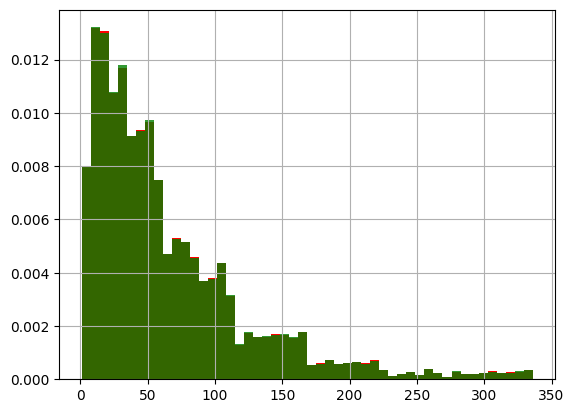

In [171]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['training_hours'].hist(bins=50, ax=ax, density=True, color='red')

# data after cca, the argument alpha makes the color transparent, so we can
# see the overlay of the 2 distributions
new_df['training_hours'].hist(bins=50, ax=ax, color='green', density=True, alpha=0.8)

<Axes: ylabel='Density'>

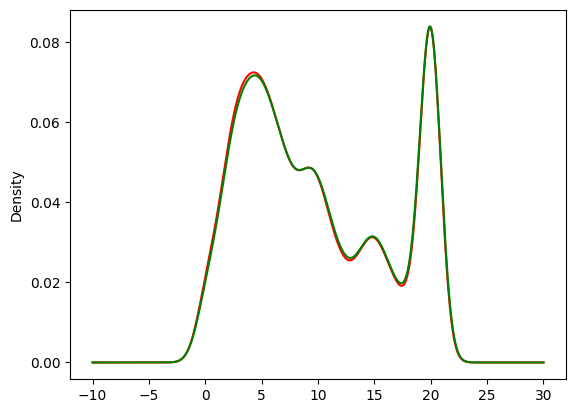

In [173]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original data
df['experience'].plot.density(color='red')

# data after cca
new_df['experience'].plot.density(color='green')

In [180]:
## How to know data missing completely at random for categorical columns ratio shoul be same

In [179]:
df['education_level'].value_counts()

education_level
Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: count, dtype: int64

In [181]:
temp = pd.concat([
            # percentage of observations per category, original data
            df['education_level'].value_counts() / len(df),

            # percentage of observations per category, cca data
            new_df['education_level'].value_counts() / len(new_df)
        ],
        axis=1)

# add column names
temp.columns = ['original', 'cca']

temp

,original,cca
education_level,,
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587


##  Univariate Impute Numerical Data DAY-36 ##

In [183]:
from sklearn.impute import  SimpleImputer

In [184]:
df=pd.read_csv('titanic_toy.csv')

In [185]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [186]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [191]:
x=df.drop(columns=['Survived'])

In [192]:
y=df['Survived']

In [193]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [194]:
mean_age=x_train['Age'].mean()
median_age=x_train['Age'].median()

mean_fare=x_train['Fare'].mean()
median_fare=x_train['Fare'].median()

In [195]:
x_train['fare_mean']=x_train['Fare'].fillna(mean_fare)

In [196]:
x_train['age_median']=x_train['Age'].fillna(median_age)

In [197]:
x_train['age_mean']=x_train['Age'].fillna(mean_age)

In [198]:
x_train['fare_median']=x_train['Fare'].fillna(median_fare)

In [199]:
x_train.sample(5)

,Age,Fare,Family,fare_mean,age_median,age_mean,fare_median
648,NaN,7.5500,0,7.5500,28.75,29.785904,7.5500
583,36.0,40.1250,0,40.1250,36.00,36.000000,40.1250
301,NaN,23.2500,2,23.2500,28.75,29.785904,23.2500
565,24.0,24.1500,2,24.1500,24.00,24.000000,24.1500
6,54.0,51.8625,0,51.8625,54.00,54.000000,51.8625


In [204]:
print('Original Age variable variance: ', x_train['Age'].var())
print('Age Variance after median imputation: ', x_train['age_median'].var())
print('Age Variance after mean imputation: ', x_train['age_mean'].var())

print('Original Fare variable variance: ', x_train['Fare'].var())
print('Fare Variance after median imputation: ', x_train['fare_median'].var())
print('Fare Variance after mean imputation: ', x_train['fare_mean'].var())

Original Age variable variance:  204.34951339046142
Age Variance after median imputation:  161.98956633460548
Age Variance after mean imputation:  161.81262452718676
Original Fare variable variance:  2448.1979137063163
Fare Variance after median imputation:  2340.09102197536
Fare Variance after mean imputation:  2324.2385256705534


In [205]:
## AGE MAI BHUT CGANGES A RAAHE H ##

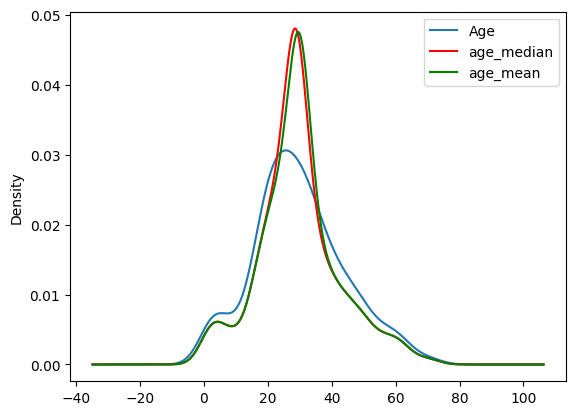

In [206]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
x_train['Age'].plot(kind='kde', ax=ax)

# variable imputed with the median
x_train['age_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
x_train['age_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

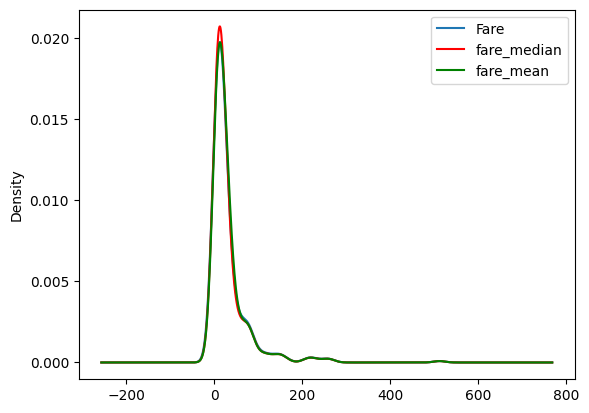

In [208]:
fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
x_train['Fare'].plot(kind='kde', ax=ax)

# variable imputed with the median
x_train['fare_median'].plot(kind='kde', ax=ax, color='red')

# variable imputed with the mean
x_train['fare_mean'].plot(kind='kde', ax=ax, color='green')

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [200]:
x_train.cov()

,Age,Fare,Family,fare_mean,age_median,age_mean,fare_median
Age,204.349513,70.719262,-6.498901,66.665205,204.349513,204.349513,64.858859
Fare,70.719262,2448.197914,17.258917,2448.197914,57.957599,55.603719,2448.197914
Family,-6.498901,17.258917,2.735252,16.385048,-5.112563,-5.146106,16.476305
fare_mean,66.665205,2448.197914,16.385048,2324.238526,55.023037,52.788341,2324.238526
age_median,204.349513,57.957599,-5.112563,55.023037,161.989566,161.812625,53.553455
age_mean,204.349513,55.603719,-5.146106,52.788341,161.812625,161.812625,51.358000
fare_median,64.858859,2448.197914,16.476305,2324.238526,53.553455,51.358000,2340.091022


In [201]:
x_train.corr()

,Age,Fare,Family,fare_mean,age_median,age_mean,fare_median
Age,1.000000,0.092644,-0.299113,0.090156,1.000000,1.000000,0.087356
Fare,0.092644,1.000000,0.208268,1.000000,0.091757,0.088069,1.000000
Family,-0.299113,0.208268,1.000000,0.205499,-0.242883,-0.244610,0.205942
fare_mean,0.090156,1.000000,0.205499,1.000000,0.089673,0.086078,0.996607
age_median,1.000000,0.091757,-0.242883,0.089673,1.000000,0.999454,0.086982
age_mean,1.000000,0.088069,-0.244610,0.086078,0.999454,1.000000,0.083461
fare_median,0.087356,1.000000,0.205942,0.996607,0.086982,0.083461,1.000000


In [205]:
import seaborn as sns

<Axes: ylabel='Age'>

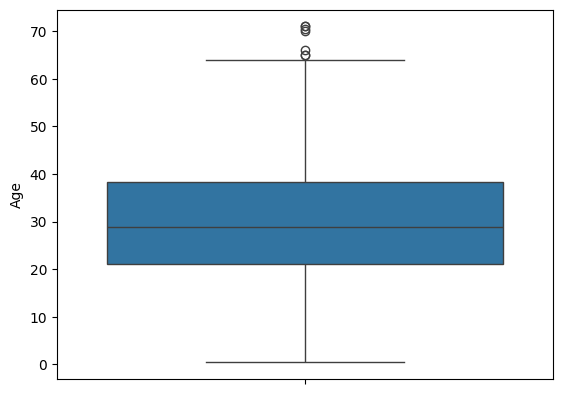

In [210]:
sns.boxplot(x_train['Age'])

<Axes: ylabel='Age_median'>

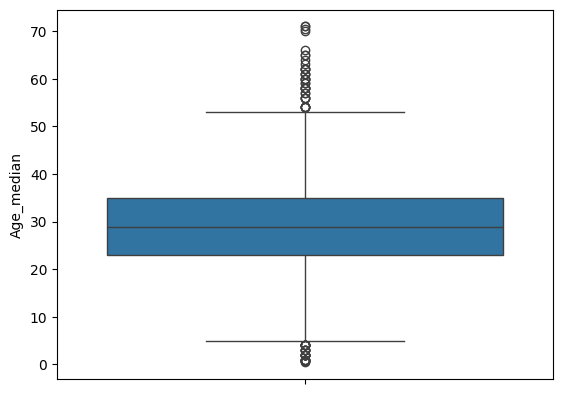

In [211]:
sns.boxplot(x_train['Age_median'])

<Axes: ylabel='age_mean'>

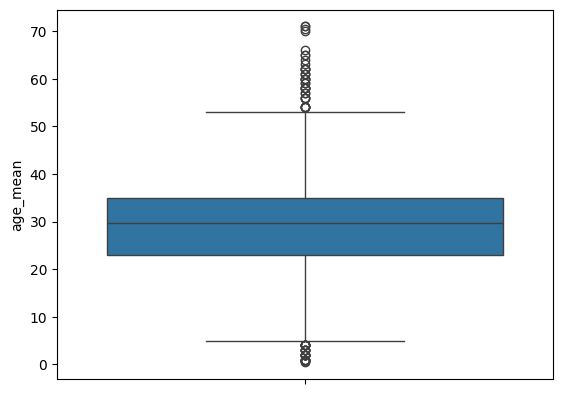

In [212]:
sns.boxplot(x_train['age_mean'])

<Axes: >

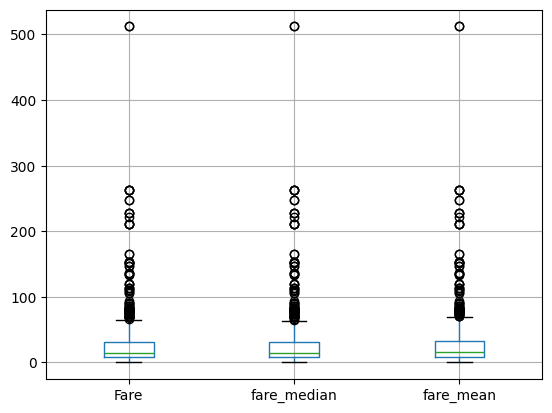

In [209]:
x_train[['Fare', 'fare_median', 'fare_mean']].boxplot()

In [210]:
## from Sklearn 

In [211]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [212]:
imputer1=SimpleImputer(strategy='median')
imputer2=SimpleImputer(strategy='mean')

In [213]:
trf=ColumnTransformer([
('imputer1',imputer1,['Age']),
('imputer2' ,imputer2,['Fare'])
],remainder='passthrough')

In [214]:
trf.fit(x_train)

C:\Users\mrraj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [215]:
x_train=trf.transform(x_train)
x_test=trf.transform(x_test)

In [216]:
## Using Arbitary value

In [217]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [218]:
x_train['Age_99']=x_train['Age'].fillna(99)
x_train['Age_minus1']=x_train['Age'].fillna(-1)

x_train['Fare_99']=x_train['Fare'].fillna(99)
x_train['Fare_minus1']=x_train['Fare'].fillna(-1)

In [219]:
x_train

,Age,Fare,Family,Age_99,Age_minus1,Fare_99,Fare_minus1
30,40.0,27.7208,0,40.0,40.0,27.7208,27.7208
10,4.0,16.7000,2,4.0,4.0,16.7000,16.7000
873,47.0,9.0000,0,47.0,47.0,9.0000,9.0000
182,9.0,31.3875,6,9.0,9.0,31.3875,31.3875
876,20.0,9.8458,0,20.0,20.0,9.8458,9.8458
...,...,...,...,...,...,...,...
534,30.0,8.6625,0,30.0,30.0,8.6625,8.6625
584,NaN,8.7125,0,99.0,-1.0,8.7125,8.7125
493,71.0,49.5042,0,71.0,71.0,49.5042,49.5042
527,NaN,221.7792,0,99.0,-1.0,221.7792,221.7792


In [220]:
## from sklearn


In [252]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [253]:
imputer1=SimpleImputer(strategy='constant',fill_value=99)
imputer2=SimpleImputer(strategy='constant',fill_value=999)

In [254]:
trf=ColumnTransformer([
    ('imputer1',imputer1,['Age']),
    ('imputer2',imputer2,['Fare'])
],remainder='passthrough')

In [255]:
trf.fit(x_train)

C:\Users\mrraj\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\compose\_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1',
                                 SimpleImputer(fill_value=99,
                                               strategy='constant'),
                                 ['Age']),
                                ('imputer2',
                                 SimpleImputer(fill_value=999,
                                               strategy='constant'),
                                 ['Fare'])])

In [256]:
x_train=trf.transform(x_train)

In [257]:
x_test=trf.transform(x_test)

In [221]:
x_train

,Age,Fare,Family,Age_99,Age_minus1,Fare_99,Fare_minus1
30,40.0,27.7208,0,40.0,40.0,27.7208,27.7208
10,4.0,16.7000,2,4.0,4.0,16.7000,16.7000
873,47.0,9.0000,0,47.0,47.0,9.0000,9.0000
182,9.0,31.3875,6,9.0,9.0,31.3875,31.3875
876,20.0,9.8458,0,20.0,20.0,9.8458,9.8458
...,...,...,...,...,...,...,...
534,30.0,8.6625,0,30.0,30.0,8.6625,8.6625
584,NaN,8.7125,0,99.0,-1.0,8.7125,8.7125
493,71.0,49.5042,0,71.0,71.0,49.5042,49.5042
527,NaN,221.7792,0,99.0,-1.0,221.7792,221.7792


## Handling Missing Categorical Data Day-37 ##


In [222]:
df=pd.read_csv('train (1).csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [223]:
df.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [224]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [316]:
df['GarageQual'].nunique()

5

<Axes: xlabel='GarageQual'>

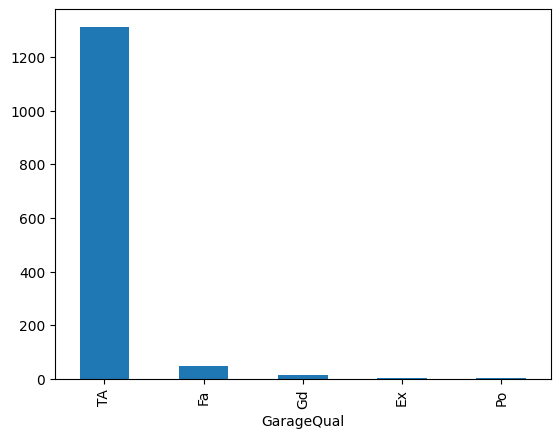

In [317]:
df['GarageQual'].value_counts().plot(kind='bar')

In [318]:
df['GarageQual'].mode()

0    TA
Name: GarageQual, dtype: object

In [319]:
df['GarageQual'].fillna('TA',inplace=True)

C:\Users\mrraj\AppData\Local\Temp\ipykernel_21148\584385255.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['GarageQual'].fillna('TA',inplace=True)


<Axes: xlabel='GarageQual'>

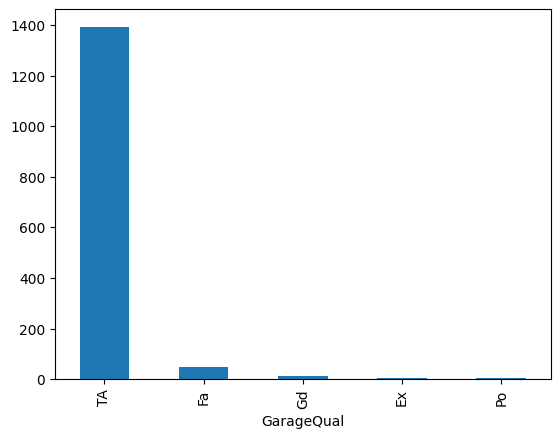

In [320]:
df['GarageQual'].value_counts().plot(kind='bar')

In [228]:
df['GarageQual'].fillna('Missing',inplace=True)

In [229]:
df['GarageQual'].nunique()

6

<Axes: xlabel='GarageQual'>

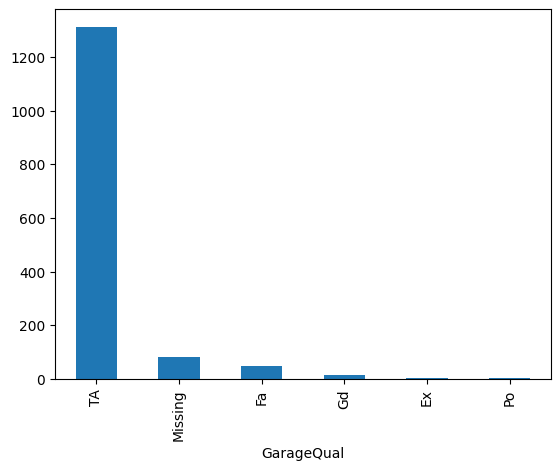

In [230]:
df['GarageQual'].value_counts().plot(kind='bar')

## Missing Indicator  DAY-38 ##

## Random Imputation in Numerical Data ##

In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [232]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [233]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [234]:
df.tail()

,Survived,Age,Fare
886,0,27.0,13.00
887,1,19.0,30.00
888,0,NaN,23.45
889,1,26.0,30.00
890,0,32.0,7.75


In [235]:
x=df.drop(columns=['Survived'])
y=df['Survived']

In [236]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [237]:
x_train['Age_Imputed']=x_train['Age']
x_test['Age_Imputed']=x_test['Age']


In [243]:
x_train

,Age,Fare,Age_Imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,56.0
493,71.0,49.5042,71.0
527,NaN,221.7792,36.0


In [244]:
x_train['Age_Imputed'][x_train['Age_Imputed'].isnull()]

Series([], Name: Age_Imputed, dtype: float64)

In [245]:
x_train['Age'].isnull().sum()

148

In [246]:
x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values

array([47.  , 17.  , 52.  , 34.  ,  2.  ,  5.  , 36.  , 18.  , 20.  ,
       28.  , 29.  , 17.  , 38.  , 23.  , 26.  , 24.  , 17.  , 42.  ,
        0.75, 28.  , 28.  , 45.5 , 22.  , 45.  , 30.  , 28.  , 38.  ,
       45.  , 35.  , 39.  , 18.  , 36.  , 44.  , 24.  , 32.  , 61.  ,
       35.  , 40.  , 25.  , 27.  ,  9.  , 29.  , 39.  , 38.  , 20.  ,
       13.  , 38.  , 21.  , 19.  , 39.  ,  4.  , 16.  , 21.  , 32.  ,
       34.  , 60.  ,  4.  , 40.  , 26.  , 23.  , 25.  , 27.  , 16.  ,
       38.  , 28.  , 37.  , 35.  , 43.  , 52.  , 24.  , 18.  , 49.  ,
       18.  , 20.  , 21.  , 52.  , 18.  , 34.5 , 27.  , 30.  , 71.  ,
       45.  , 28.  , 32.  , 45.  , 20.  , 29.  , 61.  , 14.  , 16.  ,
       21.  ,  3.  ,  1.  , 27.  , 21.  , 31.  ,  0.83, 24.  ,  9.  ,
       51.  , 45.  , 32.  , 22.  , 30.  , 29.  , 16.  , 56.  , 34.  ,
        7.  , 30.  , 34.  , 32.  , 44.  , 25.  , 22.  , 20.  , 33.  ,
       59.  , 51.  , 56.  , 24.  , 14.5 , 36.  , 25.  , 54.  , 50.  ,
       43.  , 62.  ,

In [247]:
x_train['Age_Imputed'][x_train['Age_Imputed'].isnull()]=x_train['Age'].dropna().sample(x_train['Age'].isnull().sum()).values
x_test['Age_Imputed'][x_test['Age_Imputed'].isnull()]=x_test['Age'].dropna().sample(x_train['Age'].isnull().sum()).values

ValueError: cannot set using a list-like indexer with a different length than the value

In [356]:
x_train

,Age,Fare,Age_Imputed
30,40.0,27.7208,40.0
10,4.0,16.7000,4.0
873,47.0,9.0000,47.0
182,9.0,31.3875,9.0
876,20.0,9.8458,20.0
...,...,...,...
534,30.0,8.6625,30.0
584,NaN,8.7125,26.0
493,71.0,49.5042,71.0
527,NaN,221.7792,38.0


C:\Users\mrraj\AppData\Local\Temp\ipykernel_2996\126971690.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'],label='Original',hist=False)
C:\Users\mrraj\AppData\Local\Temp\ipykernel_2996\126971690.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age

<Axes: xlabel='Age_Imputed', ylabel='Density'>

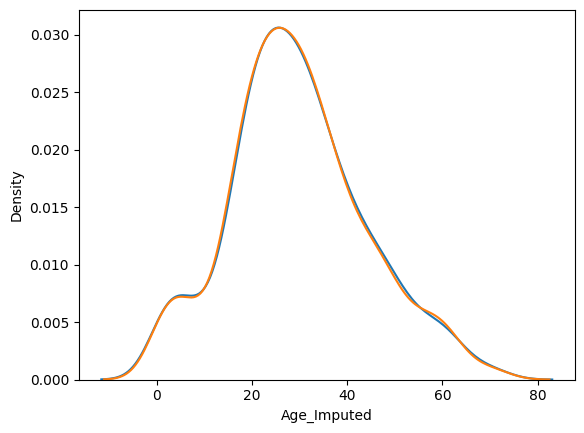

In [249]:
sns.distplot(x_train['Age'],label='Original',hist=False)
sns.distplot(x_train['Age_Imputed'],label='Imputed',hist=False)

In [357]:
##jab output kare to same fare k liye same age random sample se aane chhaiye ##

In [250]:
sampled_value=x_train['Age'].dropna().sample(1,random_state=int(observation['Fare']))

NameError: name 'observation' is not defined

## Random Imputation in Categorical Data ##

In [251]:
data=pd.read_csv('house-train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [252]:
data.head()

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000


In [258]:
data['GarageQual'].value_counts()

GarageQual
TA    1311
Fa      48
Gd      14
Ex       3
Po       3
Name: count, dtype: int64

In [259]:
data['FireplaceQu'].value_counts()

FireplaceQu
Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: count, dtype: int64

In [253]:
data.isnull().mean()

FireplaceQu    0.472603
GarageQual     0.055479
SalePrice      0.000000
dtype: float64

In [254]:
x=data
y=data['SalePrice']

In [255]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [260]:
x_train['GarageQual_imputed']=x_train['GarageQual']
x_test['GarageQual_imputed']=x_test['GarageQual']

x_train['FireplaceQual_imputed']=x_train['FireplaceQu']
x_test['FireplaceQual_imputed']=x_test['FireplaceQu']

In [261]:
x_train

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQual_imputed
455,TA,TA,175500,TA,TA
863,NaN,TA,132500,TA,NaN
504,Fa,TA,147000,TA,Fa
1413,Gd,TA,257000,TA,Gd
1389,Gd,TA,131000,TA,Gd
...,...,...,...,...,...
466,Po,TA,167000,TA,Po
299,Gd,TA,158500,TA,Gd
493,Fa,TA,155000,TA,Fa
527,Gd,TA,446261,TA,Gd


In [262]:
x_train['GarageQual_Imputed'][x_train['GarageQual_Imputed'].isnull()]=x_train['GarageQual'].dropna().sample(x_train['GarageQual'].isnull().sum()).values
x_test['GarageQual_Imputed'][x_test['GarageQual_Imputed'].isnull()]=x_test['GarageQual'].dropna().sample(x_train['GarageQual'].isnull().sum()).values

KeyError: 'GarageQual_Imputed'

In [263]:
## Ratio same rehna chhaiye kiase check kare ##

In [265]:
temp = pd.concat(
        [
            x_train['GarageQual'].value_counts() / len(x_train['GarageQual'].dropna()),
            x_train['GarageQual_imputed'].value_counts() / len(x_train)
        ],
        axis=1)

temp.columns = ['original', 'imputed']
temp

,original,imputed
TA,0.951043,0.898116
Fa,0.037171,0.035103
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [269]:
temp = pd.concat(
        [
            x_train['FireplaceQu'].value_counts() / len(x_train['FireplaceQu'].dropna()),
            x_train['FireplaceQual_imputed'].value_counts() / len(df)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.338945
TA,0.412439,0.282828
Fa,0.040917,0.028058
Po,0.027823,0.019080
Ex,0.024550,0.016835


In [270]:
## bhut changes aa rahe ##

C:\Users\mrraj\AppData\Local\Temp\ipykernel_2996\2578983325.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
C:\Users\mrraj\AppData\Local\Temp\ipykernel_2996\2578983325.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6

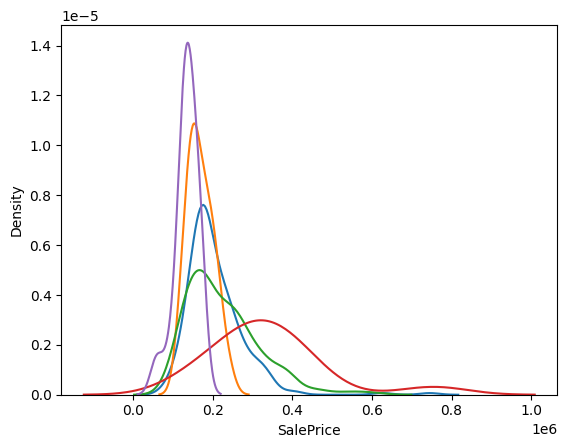

In [272]:
for category in x_train['FireplaceQu'].dropna().unique():
    sns.distplot(x_train[x_train['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

C:\Users\mrraj\AppData\Local\Temp\ipykernel_2996\4012558788.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train[x_train['FireplaceQual_imputed'] == category]['SalePrice'],hist=False,label=category)
C:\Users\mrraj\AppData\Local\Temp\ipykernel_2996\4012558788.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed

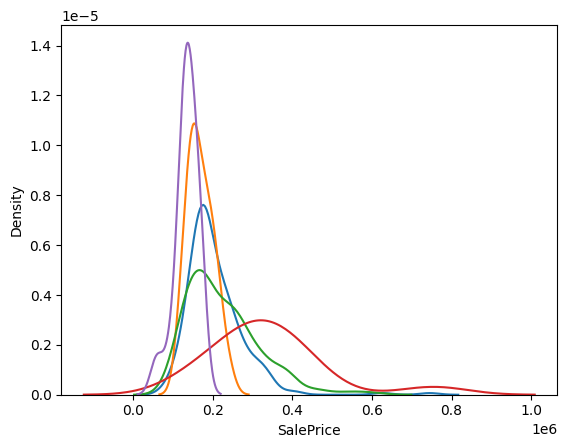

In [274]:
for category in x_train['FireplaceQual_imputed'].dropna().unique():
    sns.distplot(x_train[x_train['FireplaceQual_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()

## Missing Indiactor ##

In [275]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])

In [276]:
x=df.drop(columns=['Survived'])

In [277]:
y=df['Survived']

In [278]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [279]:
from sklearn.impute import MissingIndicator

In [280]:
mi=MissingIndicator()

In [281]:
mi.fit(x_train)

MissingIndicator()

In [282]:
x_train_missing=mi.transform(x_train)

In [283]:
x_test_missing=mi.transform(x_test)

In [284]:
x_test_missing

array([[ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [285]:
x_train['Age_NA']=x_train_missing

In [286]:
x_train

,Age,Fare,Age_NA
331,45.5,28.5000,False
733,23.0,13.0000,False
382,32.0,7.9250,False
704,26.0,7.8542,False
813,6.0,31.2750,False
...,...,...,...
106,21.0,7.6500,False
270,NaN,31.0000,True
860,41.0,14.1083,False
435,14.0,120.0000,False


In [287]:
x_test['Age_NA']=x_test_missing

In [288]:
x_test

,Age,Fare,Age_NA
709,NaN,15.2458,True
439,31.0,10.5000,False
840,20.0,7.9250,False
720,6.0,33.0000,False
39,14.0,11.2417,False
...,...,...,...
433,17.0,7.1250,False
773,NaN,7.2250,True
25,38.0,31.3875,False
84,17.0,10.5000,False


In [291]:
x_train_trf2=si.fit_transform(x_train)
x_test_trf2=si.transform(x_test)

In [295]:
x_train_trf2

array([[ 45.5   ,  28.5   ,   0.    ],
       [ 23.    ,  13.    ,   0.    ],
       [ 32.    ,   7.925 ,   0.    ],
       ...,
       [ 41.    ,  14.1083,   0.    ],
       [ 14.    , 120.    ,   0.    ],
       [ 21.    ,  77.2875,   0.    ]])

In [297]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(x_train_trf2,y_train)

y_pred = clf.predict(x_test_trf2)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6368715083798883

In [298]:
si = SimpleImputer(add_indicator=True)

In [300]:
x_train = si.fit_transform(x_train)

In [302]:
x_test = si.transform(x_test)

In [304]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

clf.fit(x_train_trf2,y_train)

y_pred = clf.predict(x_test_trf2)

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6368715083798883

In [305]:
## Automatic Select Value for Imputation ##